In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [5]:
output = '~/WORKS/TrueNets/Data/Italia/sociecon/'
comune = 'Pontremoli'
vdf = pd.read_csv(f'{output}/{comune.lower()}_volumes.csv',
                      dtype={'id': str, 'volume': float, 'height': float, 'area': float}
                      ).set_index('id', drop=False)

2168 1553


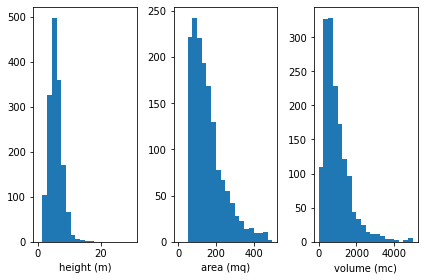

In [68]:
myvdf = vdf[(vdf.height>2) & (vdf.area>50)]
print(len(vdf), len(myvdf))
ax = plt.subplot(1,3,1)
ax.hist(myvdf.height, bins=20, range=(0,30))
ax.set_xlabel('height (m)')
ax = plt.subplot(1,3,2)
ax.hist(myvdf.area, bins=20, range=(0,500))
ax.set_xlabel('area (mq)')
ax = plt.subplot(1,3,3)
ax.hist(myvdf.volume, bins=20, range=(0,5000))
ax.set_xlabel('volume (mc)')
plt.tight_layout()

Text(0.5, 1.0, '200mc volume per household')

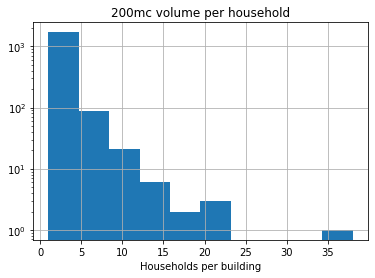

In [23]:
hdf = pd.read_csv(f'{output}/{comune.lower()}_households.csv',
                      names=('id', 'households'),
                      header=1,
                      dtype={'id': str, 'households': int}
                      ).set_index('id', drop=False)
fix, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel('Households per building')
hdf.households.hist(ax=ax)
plt.title('200mc volume per household')

Text(0, 0.5, 'reliability')

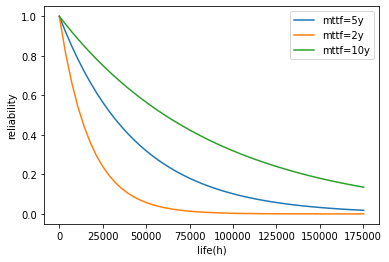

In [32]:
mttf = 5*365*24

x = np.linspace(0,5*365*24) #20yrs
def life(x,mttf):
    l=1/mttf
    return np.e**(-l*x)

plt.plot(x, life(x, 5*365*24), label='mttf=5y')
plt.plot(x, life(x, 2*365*24), label='mttf=2y')
plt.plot(x, life(x, 10*365*24), label='mttf=10y')
plt.legend()
plt.xlabel('life(h)')
plt.ylabel('reliability')
